# Bag of words meets bag of popcorn
## Part 2 / Word Vector
 

**word2vec 모델 **

**논문**
*  Efficient Estimation of Word Representations in Vector Space (2013, Mikolov) 
    * 초기버전
    * CBOW ,Skip-gram
*  Distributed Representations of Words and Phrases and their Compositionality (2013,Mikolov)
    * 튜닝기법이 추가
    
**word2vec 관련 참고 자료**

* [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781v3.pdf)
* [Distributed Representations of Words and Phrases and their Compositionality](http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
* [Word2Vec tensorflow 한글 번역본](https://tensorflowkorea.gitbooks.io/tensorflow-kr/g3doc/tutorials/word2vec/)
* [Word2Vec 블로그 정리글 - Word2Vec으로 문장 정리하기](https://ratsgo.github.io/natural%20language%20processing/2017/03/08/word2vec/)
* [Word2Vec 블로그 정리글 - Word embedding관련 정리](http://nohhj.blogspot.kr/2015/08/word-embedding.html)


1. 각 단어들을 원 핫인코딩 방식 혹은 Bag of words 방식으로 나타낼 경우 size가 매우 크고 벡터가 너무 sparse해서 neural net 성능이 잘 나오지 않는다.
2. 단어 주변이 비슷하면 그 단어들은 의미가 유사하다는 아이디어
3. 단어를 벡터로 바꿔주는 엠베딩(Embedding)과정
4. Word2Vec은 분산 된 텍스트 표현을 사용하여 개념 간 유사성을 본다. 예를 들어, 파리와 프랑스가 베를린과 독일이 (수도와 나라) 같은 방식으로 관련되어 있음을 이해한다.

![image.png](https://camo.githubusercontent.com/97ec511f00892d0560dab2419288e434ded52255/68747470733a2f2f312e62702e626c6f6773706f742e636f6d2f2d51374638756c44366643302f5567766e564353476d58492f41414141414141414162672f4d43574c545942756668732f73313630302f696d61676530302e676966)
![image.png](http://i.imgur.com/agTBWiT.png)

5 CBOW와 Skip-gram 기법 사용

* CBOW 
    * CBOW(continuous bag-of-words)
    * 전체 텍스트로 하나의 단어를 예측한다.
    * 작은 데이터셋일수록 유리    
* Skip-Gram
    * 타겟 단어들로 부터 원본 단어들을 역으로 유추하는 과정
    * 큰 규모의 데이터셋일수록 유리
![image.png](https://camo.githubusercontent.com/1a8235d525ad46485e764e5008cbc29c8c17a5be/68747470733a2f2f692e696d6775722e636f6d2f795859314c78562e706e67)







In [3]:

# 참고 : https://gist.github.com/yong27/7869662
# http://www.racketracer.com/2016/07/06/pandas-in-parallel/
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [4]:
from kaggleBagofWord import kaggleBagofWord
##전처리과정에 사용하는 것들을 class화

In [5]:
import pandas as pd

train = pd.read_csv('data/labeledTrainData.tsv', 
                    header=0, delimiter='\t', quoting=3)
test = pd.read_csv('data/testData.tsv', 
                   header=0, delimiter='\t', quoting=3)
unlabeled_train = pd.read_csv('data/unlabeledTrainData.tsv', 
                              header=0, delimiter='\t', quoting=3)

print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)

(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [6]:
kaggleBagofWord.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [10]:
sentences = []
for review in train["review"]:
    sentences += kaggleBagofWord.review_to_sentences(
        review, remove_stopwords=False)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'...'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.happierabroad.com"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'12.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Be

In [12]:
sentences

[['with',
  'all',
  'this',
  'stuff',
  'go',
  'down',
  'at',
  'the',
  'moment',
  'with',
  'mj',
  'i',
  've',
  'start',
  'listen',
  'to',
  'his',
  'music',
  'watch',
  'the',
  'odd',
  'documentari',
  'here',
  'and',
  'there',
  'watch',
  'the',
  'wiz',
  'and',
  'watch',
  'moonwalk',
  'again'],
 ['mayb',
  'i',
  'just',
  'want',
  'to',
  'get',
  'a',
  'certain',
  'insight',
  'into',
  'this',
  'guy',
  'who',
  'i',
  'thought',
  'was',
  'realli',
  'cool',
  'in',
  'the',
  'eighti',
  'just',
  'to',
  'mayb',
  'make',
  'up',
  'my',
  'mind',
  'whether',
  'he',
  'is',
  'guilti',
  'or',
  'innoc'],
 ['moonwalk',
  'is',
  'part',
  'biographi',
  'part',
  'featur',
  'film',
  'which',
  'i',
  'rememb',
  'go',
  'to',
  'see',
  'at',
  'the',
  'cinema',
  'when',
  'it',
  'was',
  'origin',
  'releas'],
 ['some',
  'of',
  'it',
  'has',
  'subtl',
  'messag',
  'about',
  'mj',
  's',
  'feel',
  'toward',
  'the',
  'press',
  'and'

In [13]:
for review in unlabeled_train["review"]:
    sentences += kaggleBagofWord.review_to_sentences(
        review, remove_stopwords=False)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.archive.org/details/LovefromaStranger"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:282: UserWarning: "http://www.loosechangeguide.com/LooseChangeGuide.html"" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
C:\ProgramData\Anaconda

In [14]:
len(sentences)


795538

In [15]:
sentences[0][:10]


['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [16]:
sentences[1][:10]


['mayb', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into']

Word2Vec 모델의 파라메터

* 아키텍처 : 아키텍처 옵션은 skip-gram (default) 또는 CBOW 모델이다. skip-gram (default)은 느리지 만 더 나은 결과를 낸다.

* 학습 알고리즘 : Hierarchical softmax (default) 또는 negative 샘플링. 여기에서는 기본값이 잘 동작한다.

* 빈번하게 등장하는 단어에 대한 다운 샘플링 : Google 문서는 .00001에서 .001 사이의 값을 권장한다. 여기에서는 0.001에 가까운 값이 최종 모델의 정확도를 높이는 것으로 보여진다.

* 단어 벡터 차원 : 많은 feature를 사용한다고 항상 좋은 것은 아니지만 대체적으로 좀 더 나은 모델이 된다. 합리적인 값은 수십에서 수백 개가 될 수 있고 여기에서는 300으로 지정했다.

* 컨텍스트 / 창 크기 : 학습 알고리즘이 고려해야하는 컨텍스트의 단어 수는 얼마나 될까? hierarchical softmax 를 위해 좀 더 큰 수가 좋지만 10 정도가 적당하다.

* Worker threads : 실행할 병렬 프로세스의 수로 컴퓨터마다 다르지만 대부분의 시스템에서 4에서 6 사이의 값을 사용하다.

* 최소 단어 수 : 어휘의 크기를 의미있는 단어로 제한하는 데 도움이 된다. 모든 문서에서이 여러 번 발생하지 않는 단어는 무시된다. 10에서 100 사이가 적당하며, 이 경진대회의 데이터는 각 영화가 30개씩의 리뷰가 있기 때문에 개별 영화 제목에 너무 많은 중요성이 붙는 것을 피하기 위해 최소 단어 수를 40으로 설정한다. 그 결과 전체 어휘 크기는 약 15,000 단어가 된다. 높은 값은 제한 된 실행시간에 도움이 된다.

In [17]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [18]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 단어 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

2018-04-18 17:11:05,747 : INFO : collecting all words and their counts
2018-04-18 17:11:05,749 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-18 17:11:05,868 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2018-04-18 17:11:05,943 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2018-04-18 17:11:06,021 : INFO : PROGRESS: at sentence #30000, processed 671315 words, keeping 20370 word types
2018-04-18 17:11:06,116 : INFO : PROGRESS: at sentence #40000, processed 897815 words, keeping 23125 word types
2018-04-18 17:11:06,194 : INFO : PROGRESS: at sentence #50000, processed 1116963 words, keeping 25365 word types
2018-04-18 17:11:06,281 : INFO : PROGRESS: at sentence #60000, processed 1338404 words, keeping 27283 word types
2018-04-18 17:11:06,374 : INFO : PROGRESS: at sentence #70000, processed 1561580 words, keeping 29024 word types
2018-04-18 17:11:06,474 : INFO : PROGRESS: 

2018-04-18 17:11:20,419 : INFO : PROGRESS: at sentence #720000, processed 16105665 words, keeping 83036 word types
2018-04-18 17:11:20,500 : INFO : PROGRESS: at sentence #730000, processed 16332046 words, keeping 83571 word types
2018-04-18 17:11:20,575 : INFO : PROGRESS: at sentence #740000, processed 16553079 words, keeping 84127 word types
2018-04-18 17:11:20,694 : INFO : PROGRESS: at sentence #750000, processed 16771406 words, keeping 84599 word types
2018-04-18 17:11:20,795 : INFO : PROGRESS: at sentence #760000, processed 16990810 words, keeping 85068 word types
2018-04-18 17:11:20,882 : INFO : PROGRESS: at sentence #770000, processed 17217947 words, keeping 85644 word types
2018-04-18 17:11:21,081 : INFO : PROGRESS: at sentence #780000, processed 17448093 words, keeping 86160 word types
2018-04-18 17:11:21,337 : INFO : PROGRESS: at sentence #790000, processed 17675169 words, keeping 86665 word types
2018-04-18 17:11:21,440 : INFO : collected 86996 word types from a corpus of 177

2018-04-18 17:12:16,615 : INFO : EPOCH 2 - PROGRESS: at 93.23% examples, 495328 words/s, in_qsize 8, out_qsize 0
2018-04-18 17:12:17,615 : INFO : EPOCH 2 - PROGRESS: at 96.86% examples, 494001 words/s, in_qsize 8, out_qsize 0
2018-04-18 17:12:18,606 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-18 17:12:18,636 : INFO : EPOCH 2 - PROGRESS: at 99.89% examples, 489947 words/s, in_qsize 2, out_qsize 1
2018-04-18 17:12:18,637 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-18 17:12:18,660 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-18 17:12:18,665 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-04-18 17:12:18,666 : INFO : EPOCH - 2 : training on 17798270 raw words (12874729 effective words) took 26.3s, 489909 effective words/s
2018-04-18 17:12:19,712 : INFO : EPOCH 3 - PROGRESS: at 3.02% examples, 386409 words/s, in_qsize 7, out_qsize 0
2018-04-18 17:12:20,718 : INFO : EPOCH 3 - PR

2018-04-18 17:13:22,291 : INFO : EPOCH 4 - PROGRESS: at 96.19% examples, 337529 words/s, in_qsize 7, out_qsize 0
2018-04-18 17:13:23,299 : INFO : EPOCH 4 - PROGRESS: at 99.27% examples, 339239 words/s, in_qsize 7, out_qsize 0
2018-04-18 17:13:23,487 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-04-18 17:13:23,499 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-04-18 17:13:23,533 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-04-18 17:13:23,541 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-04-18 17:13:23,542 : INFO : EPOCH - 4 : training on 17798270 raw words (12871539 effective words) took 37.9s, 339530 effective words/s
2018-04-18 17:13:24,597 : INFO : EPOCH 5 - PROGRESS: at 2.62% examples, 333147 words/s, in_qsize 8, out_qsize 0
2018-04-18 17:13:25,622 : INFO : EPOCH 5 - PROGRESS: at 5.25% examples, 331866 words/s, in_qsize 7, out_qsize 0
2018-04-18 17:13:26,692 : INFO : EPOCH 5 - PRO

In [19]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2018-04-18 17:16:30,416 : INFO : precomputing L2-norms of word weight vectors
2018-04-18 17:16:30,579 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2018-04-18 17:16:30,593 : INFO : not storing attribute vectors_norm
2018-04-18 17:16:30,604 : INFO : not storing attribute cum_table
2018-04-18 17:16:31,757 : INFO : saved 300features_40minwords_10text


In [20]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [21]:
model.wv.doesnt_match("france england germany berlin".split())


2018-04-18 17:16:39,816 : WARNING : vectors for words {'germany', 'france'} are not present in the model, ignoring these words


'berlin'

In [22]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6455962061882019),
 ('businessman', 0.510991096496582),
 ('millionair', 0.5008515119552612),
 ('ladi', 0.4981335997581482),
 ('lad', 0.49504709243774414),
 ('widow', 0.47404539585113525),
 ('men', 0.4629068970680237),
 ('billionair', 0.4625746011734009),
 ('doctor', 0.4623534381389618),
 ('lawyer', 0.4603825807571411)]

In [23]:
model.wv.most_similar("queen")

[('princess', 0.6186563968658447),
 ('victoria', 0.5793728232383728),
 ('madam', 0.5658301115036011),
 ('latifah', 0.5642294883728027),
 ('stepmoth', 0.5587388873100281),
 ('countess', 0.5580689907073975),
 ('duchess', 0.5517499446868896),
 ('antoinett', 0.5388837456703186),
 ('mistress', 0.5358436107635498),
 ('regina', 0.5324931144714355)]

In [24]:
# model.wv.most_similar("happy")
model.wv.most_similar("happi") # stemming 처리 시

[('unhappi', 0.4372105002403259),
 ('sad', 0.42206454277038574),
 ('satisfi', 0.3913938105106354),
 ('happier', 0.377570241689682),
 ('afraid', 0.37706080079078674),
 ('sappi', 0.3670363128185272),
 ('comfort', 0.366341233253479),
 ('glad', 0.3615718483924866),
 ('bitter', 0.36094674468040466),
 ('lucki', 0.35873594880104065)]

In [25]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

2018-04-18 17:17:09,750 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2018-04-18 17:17:10,107 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2018-04-18 17:17:10,109 : INFO : setting ignored attribute vectors_norm to None
2018-04-18 17:17:10,110 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2018-04-18 17:17:10,113 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2018-04-18 17:17:10,118 : INFO : setting ignored attribute cum_table to None
2018-04-18 17:17:10,122 : INFO : loaded 300features_40minwords_10text
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


11986
[-0.00405244 -0.04393338  0.02327532  0.00611522  0.03493676  0.12559651
 -0.16493465  0.05255285  0.07809427  0.03239263]


In [26]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [27]:
df.head(10)

,x,y
with,-14.200181,5.427143
all,-1.380511,6.828491
this,6.330678,-2.005665
stuff,10.941723,-1.083465
go,3.309034,-17.628311
down,-19.720673,8.620927
at,-19.558174,14.072529
the,-5.001111,8.451332
moment,8.049493,10.542526
mj,-25.131575,-1.620774


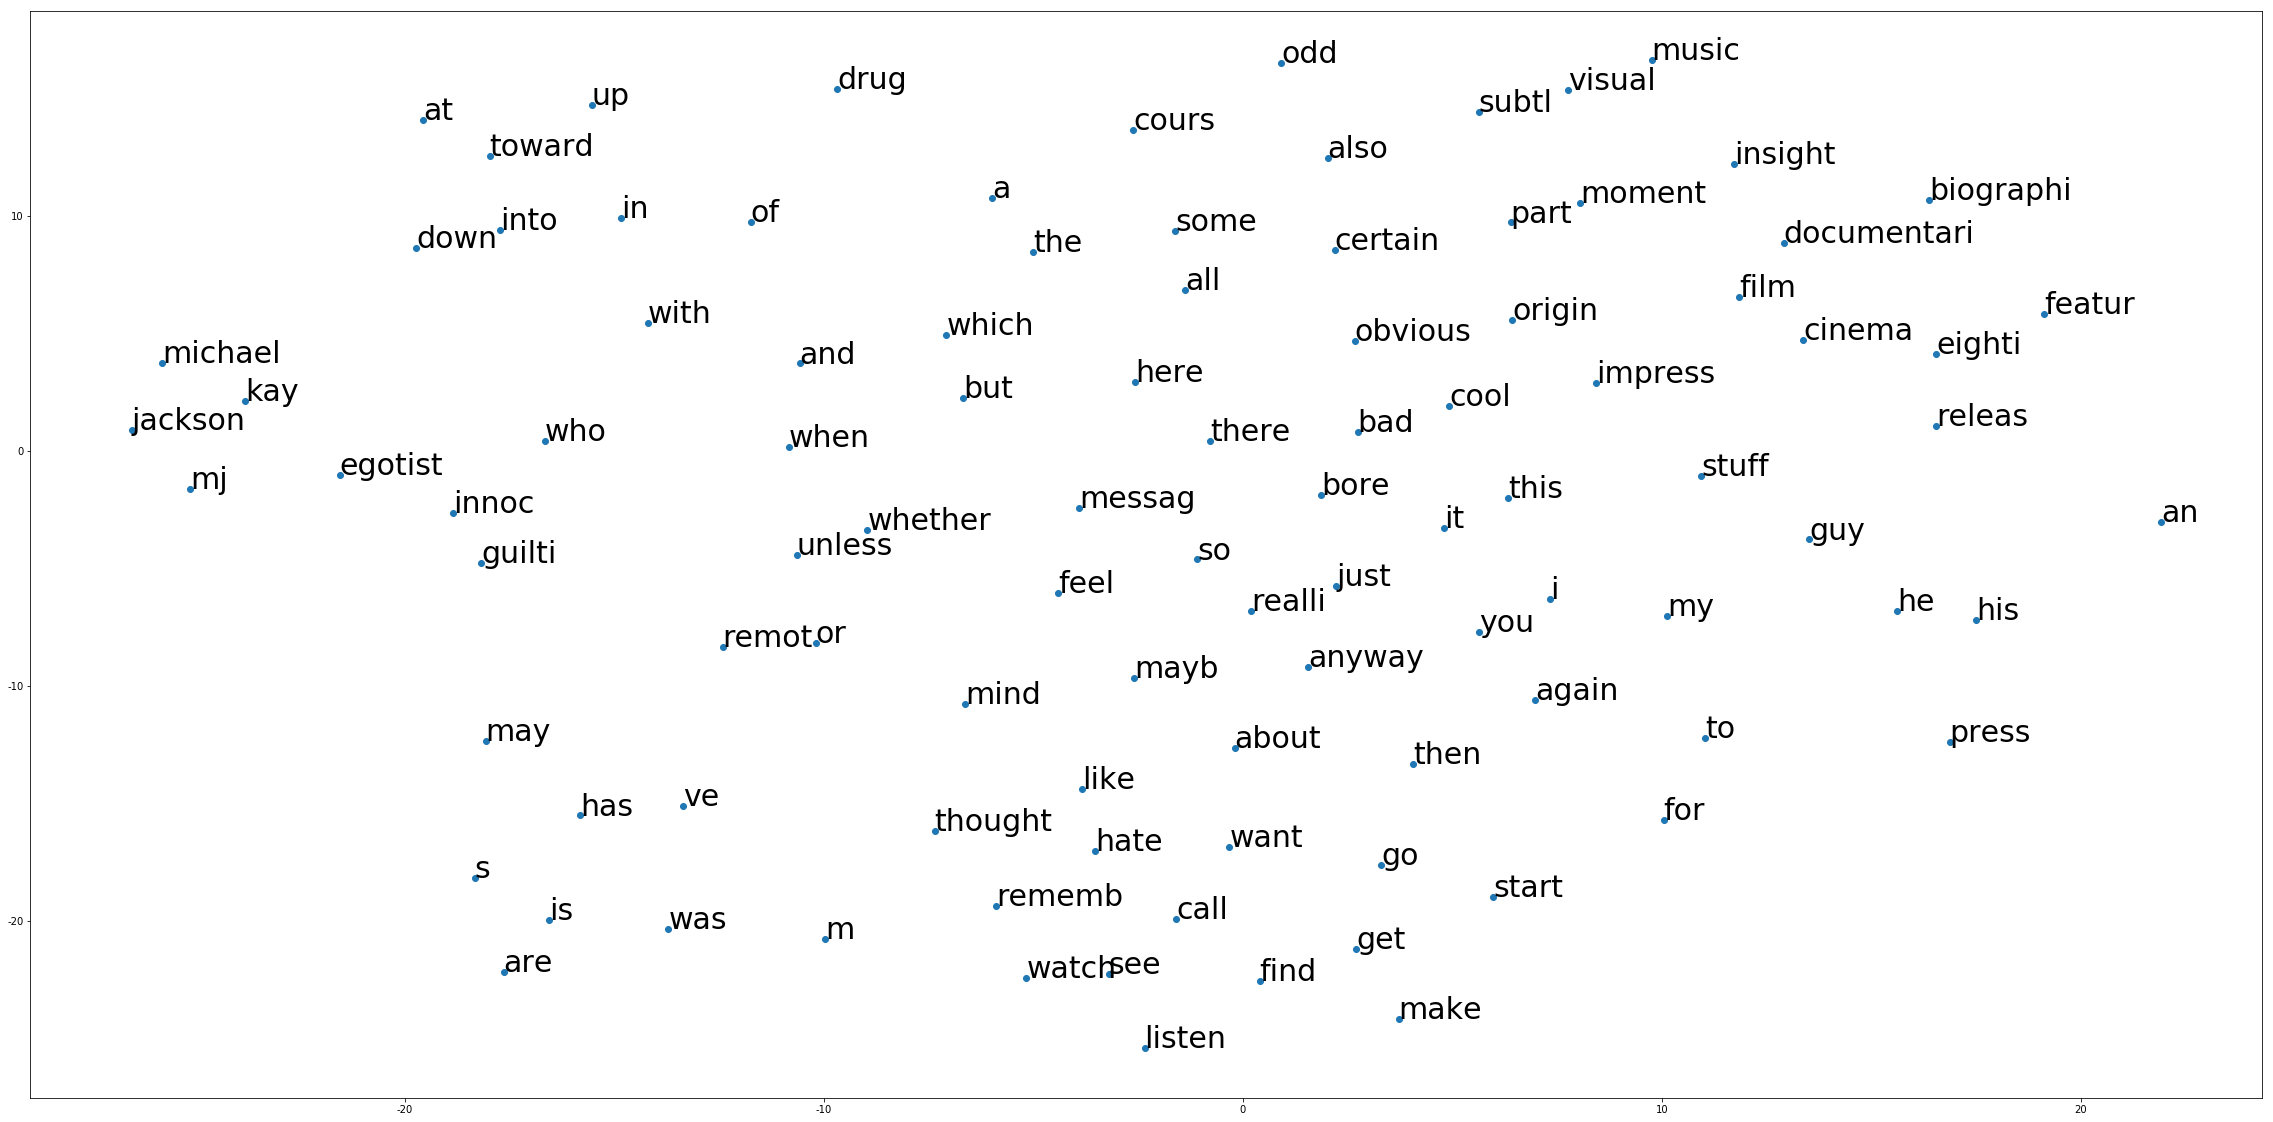

In [28]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [29]:
import numpy as np

def makeFeatureVec(words, model, num_features):
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,),dtype="float32")

    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [30]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고 
    # 2D numpy 배열을 반환한다.
    
    # 카운터를 초기화 한다.
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews),num_features),dtype="float32")
    
    for review in reviews:
       # 매 1000개 리뷰마다 상태를 출력
       if counter%1000. == 0.:
           print("Review %d of %d" % (counter, len(reviews)))
       # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
       reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       # 카운터를 증가시킨다.
       counter = counter + 1.
    return reviewFeatureVecs

In [33]:
# 멀티스레드로 4개의 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = kaggleBagofWord.apply_by_multiprocessing(\
        reviews["review"], kaggleBagofWord.review_to_wordlist,\
        workers=4)
    return clean_reviews

In [34]:
%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(train), model, num_features )

Review 0 of 25000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 2min 43s


In [35]:
%time testDataVecs = getAvgFeatureVecs(\
        getCleanReviews(test), model, num_features )

Review 0 of 25000


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 2min 28s


In [36]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)

In [37]:
%time forest = forest.fit( trainDataVecs, train["sentiment"] )

Wall time: 21.1 s


In [38]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, trainDataVecs, \
    train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 3min 18s


In [39]:
score

0.904642208

In [40]:
result = forest.predict( testDataVecs )

In [41]:
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv('data/Word2Vec_AverageVectors_{0:.5f}.csv'.format(score), 
              index=False, quoting=3 )

In [42]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

66


0    12533
1    12467
Name: sentiment, dtype: int64

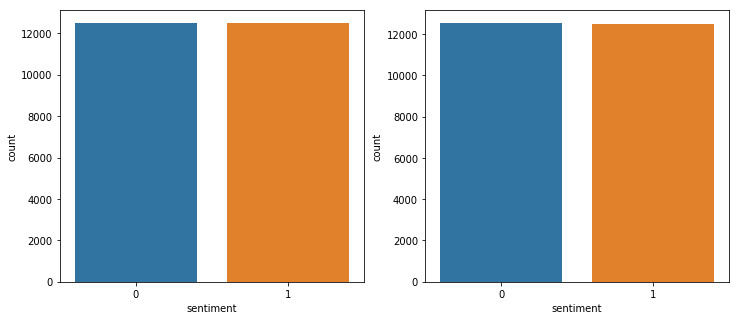

In [43]:
import seaborn as sns 
%matplotlib inline

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])

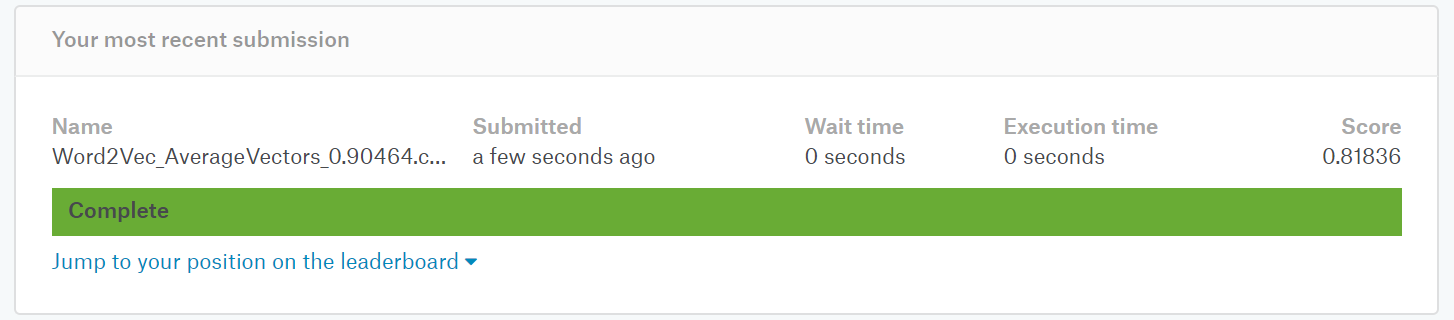


성능 개선을 위해 Vector averaging 대신
tf-idf 혹은 Clusturing 사용할 수 있다.